In [3]:
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.9 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=e7a207f63887f90f14d842b29a2acf18c3afca168bd4a3c1e12e1de69e3cafd5
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.0
    Uninstalling pyparsing-3.1.0:
      Successfully uninstalled pyparsing-3.1.0
  Attempting uninstall: idna
    Found e

In [4]:
from roboflow import Roboflow
rf = Roboflow(api_key="hAB5vzRd005MntUPbdkl")
project = rf.workspace("projectverba").project("yolo-waste-detection")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics<=8.0.20`, to intall it `pip install ultralytics<=8.0.20`.


Extracting Dataset Version Zip to YOLO-Waste-Detection-1 in yolov8:: 100%|██████████| 26220/26220 [00:04<00:00, 6290.65it/s] 


In [5]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.9/626.9 kB 33.9 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

model = YOLO()
model.train(data="YOLO-Waste-Detection-1/data.yaml", epochs=50)

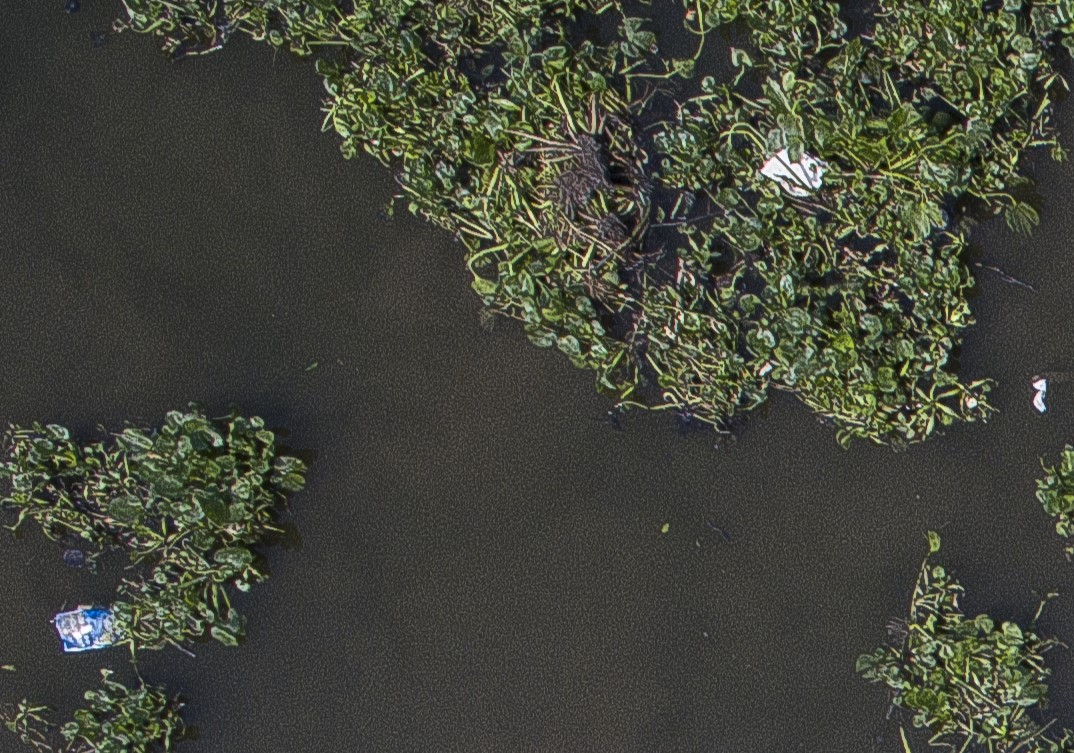

In [11]:
import cv2
from google.colab.patches import cv2_imshow

image = cv2.imread("cropped_image.jpg")
cv2_imshow(image)

In [10]:
results = model.predict(image)

[(742, 142, 103, 53), (1026, 373, 27, 47), (42, 597, 105, 59)]


In [12]:
def draw_box(image, box_parameter):
    font = cv2.FONT_HERSHEY_SIMPLEX
    x, y, width, height = box_parameter
    color = (234, 221, 202) # yellow
    cv2.rectangle(image, (x, y), (x + width, y + height), color, 2)
    cv2.putText(image, 'pastic', (x, y - 10), font, 0.5, color, 2)
    return image

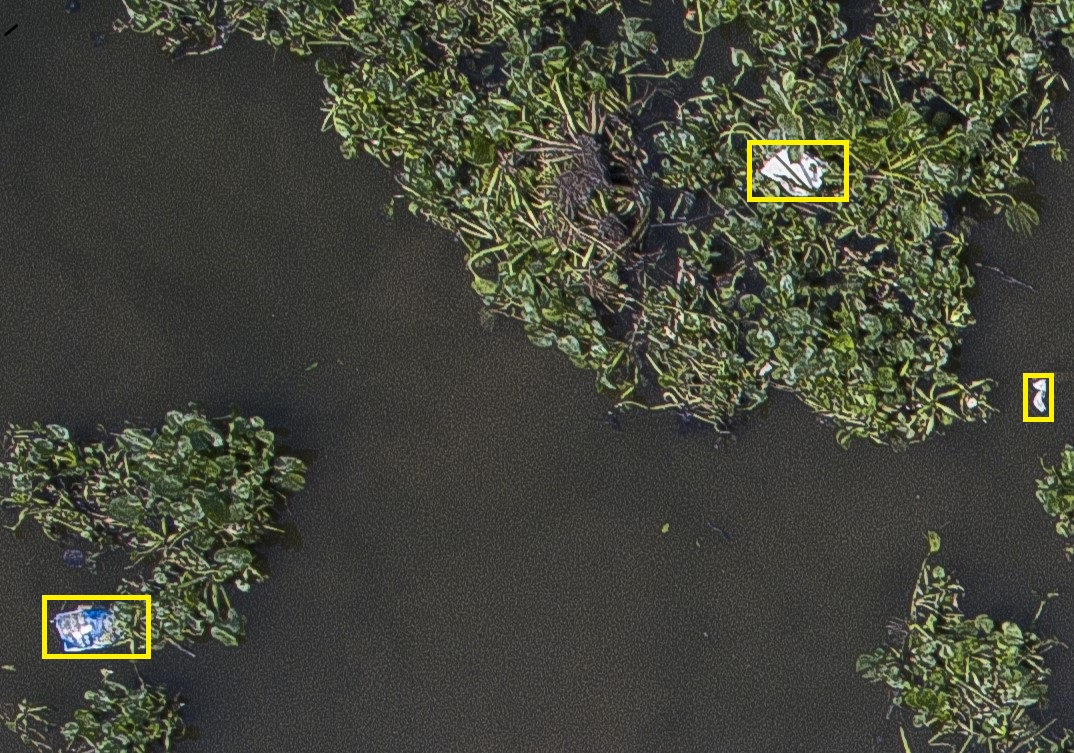

In [14]:
from google.colab.patches import cv2_imshow

for result in results:
    draw_box(image, result)

cv2_imshow(image)